In [2]:
import requests
import math

# Constants
SOLAR_MAX_IRRADIANCE = 5  # kWh/m²/day (approx. for sunny areas in India)
AIR_DENSITY = 1.225  # kg/m³ (at sea level)
WATER_DENSITY = 1000  # kg/m³ (density of water)
GRAVITY = 9.81  # m/s² (acceleration due to gravity)

# API setup
API_KEY = "5a5dc4c0a633d9df1f1fd24f47b52ea0"
LOCATION = "Pen,IN"  # Replace with your city
URL = f"http://api.openweathermap.org/data/2.5/weather?q={LOCATION}&appid={API_KEY}"

# Fetch data from API
response = requests.get(URL)
weather_data = response.json()

# Check if the request was successful
if response.status_code == 200:
    print("Weather data fetched successfully!")
else:
    print("Failed to fetch weather data. Please check the API key or city name.")
    exit()



Weather data fetched successfully!


In [3]:
# Extract required values
cloud_cover = weather_data["clouds"]["all"]  # Cloud cover (%)

# Parameters for Solar, Wind, and Hydro Energy
# Solar
solar_area = 5000  # m² (panel area)
solar_efficiency = 0.18  # 18%
performance_ratio = 0.85  # System efficiency


# Solar Energy Calculation
def calculate_solar_energy(area, efficiency, cloud_cover, performance_ratio):
    irradiance = SOLAR_MAX_IRRADIANCE * (1 - cloud_cover / 100)
    energy = area * efficiency * irradiance * performance_ratio
    return energy

# Calculate energies
solar_energy = calculate_solar_energy(solar_area, solar_efficiency, cloud_cover, performance_ratio)

# Output results
print(f"Cloud Cover: {cloud_cover}%")
print(f"Solar Energy Generated: {solar_energy:.2f} kWh/day")

Cloud Cover: 2%
Solar Energy Generated: 3748.50 kWh/day


In [4]:
# Extract required values
wind_speed = weather_data["wind"]["speed"]  # Wind speed (m/s)

# Parameters for Wind Energy
# Wind
blade_radius = 45  # meters (turbine blade length)
turbine_efficiency = 0.3  # 30%
hours = 24  # Time in hours

# Wind Energy Calculation
def calculate_wind_energy(blade_radius, wind_speed, turbine_efficiency, hours):
    swept_area = math.pi * blade_radius**2
    power = 0.5 * AIR_DENSITY * swept_area * (wind_speed**3) * turbine_efficiency
    energy = power * hours / 1000  # Convert Watts to kWh
    return energy

wind_energy = calculate_wind_energy(blade_radius, wind_speed, turbine_efficiency, hours)

print(f"Wind Speed: {wind_speed} m/s")
print(f"Wind Energy Generated: {wind_energy:.2f} kWh/day")

Wind Speed: 4.02 m/s
Wind Energy Generated: 1822.60 kWh/day


In [5]:
def estimate_hydropower(flow_rate, head_height, efficiency=0.85):

    density_water = 1000  # kg/m³ (density of water)
    g = 9.81  # m/s² (acceleration due to gravity)
    power = density_water * g * flow_rate * head_height * efficiency  # Power in Watts
    return power / 1000  # Convert to kW


def calculate_flow_rate(precipitation, catchment_area, runoff_coefficient=0.8):

    # Convert catchment area from km² to m²
    catchment_area_m2 = catchment_area * 1e6
    # Convert precipitation from mm to meters
    precipitation_m = precipitation / 1000
    # Calculate flow volume (m³/s) using runoff coefficient
    flow_volume_m3_per_hour = precipitation_m * catchment_area_m2 * runoff_coefficient
    flow_rate = flow_volume_m3_per_hour / 3600  # Convert to m³/s
    return flow_rate


if weather_data:
    # Extract rainfall data (in mm over the last hour, default to 1 mm if not available)
    precipitation = 50 #weather_data.get("rain", {}).get("1h", 1)  # mm/hour
    # Define catchment area (in km², can vary based on location)
    catchment_area = 2  # km²
    # Define head height (in meters, based on geography)
    head_height = 20  # meters
    # Runoff coefficient (fraction of rainfall contributing to runoff, typically 0.6–0.9)
    runoff_coefficient = 0.85  # Adjust based on terrain (e.g., urban vs rural)

    # Calculate flow rate
    flow_rate = calculate_flow_rate(precipitation, catchment_area, runoff_coefficient)

    # Estimate hydropower
    hydropower = estimate_hydropower(flow_rate, head_height)

    # Output results
    print(f"Precipitation: {precipitation} mm/hour")
    print(f"Catchment Area: {catchment_area} km²")
    print(f"Flow Rate: {flow_rate:.2f} m³/s")
    print(f"Head Height: {head_height} m")
    print(f"Estimated Hydropower: {hydropower:.2f} kW")


Precipitation: 50 mm/hour
Catchment Area: 2 km²
Flow Rate: 23.61 m³/s
Head Height: 20 m
Estimated Hydropower: 3937.62 kW


Cloud Cover: 2%
Solar Energy Generated: 3748.50 kWh/day
Wind Speed: 4.02 m/s
Wind Energy Generated: 1822.60 kWh/day
Precipitation: 50 mm/hour
Catchment Area: 2 km²
Flow Rate: 23.61 m³/s
Head Height: 20 m
Estimated Hydropower: 3937.62 kW


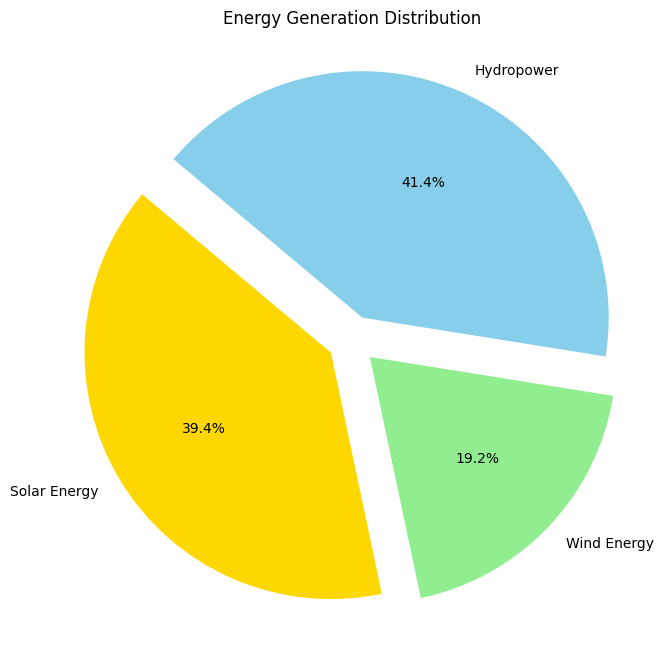

In [6]:
import matplotlib.pyplot as plt

# Energy values calculated previously
solar_energy # Replace with your calculated value
wind_energy # Replace with your calculated value
hydropower # Replace with your calculated value



print(f"Cloud Cover: {cloud_cover}%")
print(f"Solar Energy Generated: {solar_energy:.2f} kWh/day")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Wind Energy Generated: {wind_energy:.2f} kWh/day")
# Output results
print(f"Precipitation: {precipitation} mm/hour")
print(f"Catchment Area: {catchment_area} km²")
print(f"Flow Rate: {flow_rate:.2f} m³/s")
print(f"Head Height: {head_height} m")
print(f"Estimated Hydropower: {hydropower:.2f} kW")

# Create pie chart with space between slices
labels = ['Solar Energy', 'Wind Energy', 'Hydropower']
values = [solar_energy, wind_energy, hydropower]
colors = ['gold', 'lightgreen', 'skyblue']
explode = [0.1, 0.1, 0.1]  # Creates space for all slices equally

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Energy Generation Distribution')
plt.show()

Solar Energy Generated: 3748.50 kWh/day
Wind Energy Generated: 1822.60 kWh/day
Hydropower Energy Generated: 3937.62 kWh/day
Total energy Generated: 9508.726188 kWh/day
Energy demand: 5000.000000 kWh/day
Need to generate: 0.000000 kWh/day


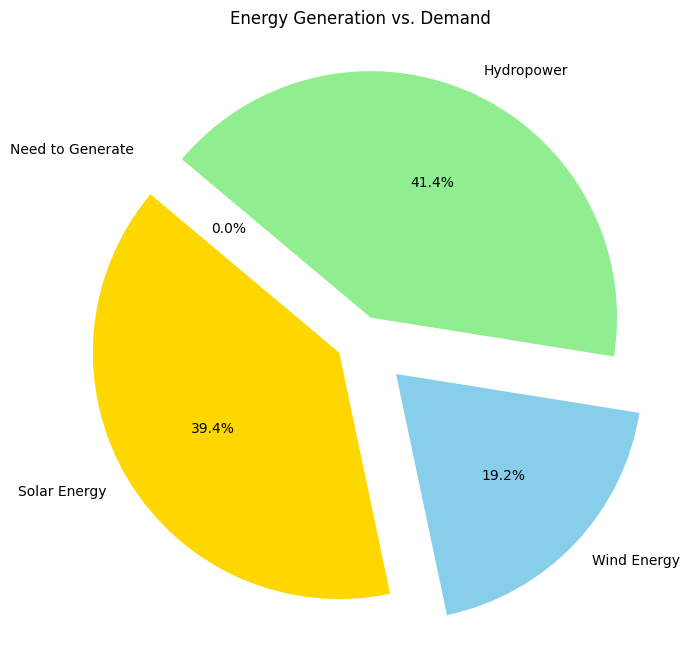

In [7]:
import matplotlib.pyplot as plt

# Energy values (replace these with your calculated values)
solar_energy # Replace with your calculated value
wind_energy # Replace with your calculated value
hydropower # Replace with your calculated value

# Calculate total energy generated
total_energy_generated = solar_energy + wind_energy + hydropower

# User input for energy demand
energy_demand = float(input("Enter the energy demand (in kWh): "))

# Calculate the remaining energy that needs to be generated
need_to_generate = max(0, energy_demand - total_energy_generated)

print(f"Solar Energy Generated: {solar_energy:.2f} kWh/day")
print(f"Wind Energy Generated: {wind_energy:.2f} kWh/day")
print(f"Hydropower Energy Generated: {hydropower:.2f} kWh/day")
print(f"Total energy Generated: {total_energy_generated:2f} kWh/day")
print(F"Energy demand: {energy_demand:2f} kWh/day")
print(f"Need to generate: {need_to_generate:2f} kWh/day")

# Create pie chart data
labels = ['Solar Energy', 'Wind Energy', 'Hydropower', 'Need to Generate']
values = [solar_energy, wind_energy, hydropower, need_to_generate]
colors = ['gold', 'skyblue', 'lightgreen', 'red']
explode = [0.1, 0.2, 0.1, 0.1]  # Adds spacing for all slices

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Energy Generation vs. Demand')
plt.show()



